# FIFA DATASET CLEANING

INTRODUCTION: Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset in order to improve its quality and usefulness for analysis. It is an important step in the data analysis process because it ensures that the data is accurate, consistent, and reliable, which can lead to more meaningful insights and better decision-making.


WHAT I WOULD BE LOOKING OUT FOR:

-"Club" containing irregular characters


-"Height" and "Weight" column to be converted to a unique standard format.

-"Value", "Wage", "Release Clause": Contains Euro currency sign (to be removed) and some contains K, M(to be replaced with respective values).

-"W/F", "SM" and "IR" to be cleaned.

-"Joined" must be datetime dtype.

-"Hits" column to be cleaned and transformed into integer.

-Transform some columns to categorical type.



# Importing Libraries needed

In [256]:
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt



# Importing the CSV file

In [257]:
fifa_df = pd.read_csv("./Downloads/archive (3)/fifa21 raw data v2.csv")

C:\Users\PAVILION\AppData\Local\Temp\ipykernel_13472\3200050204.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv("./Downloads/archive (3)/fifa21 raw data v2.csv")


In [258]:
fifa_df1 = fifa_df.copy()

# Understanding the Data

In [259]:
pd.set_option("display.max_columns", None)
fifa_df.head()


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


This displays the first five(5) rows of all existing column.

In [260]:
fifa_df.shape

(18979, 77)

In [261]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [262]:
fifa_df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

# Dropping columns that are irrelevant to the analysis

In [263]:
fifa_df.drop('photoUrl', axis=1, inplace=True)

In [264]:
fifa_df.drop("playerUrl", axis =1, inplace=True)

In [265]:
fifa_df.drop("LongName", axis =1, inplace=True)

# Checking for columns with null value

In [266]:
null_mask = fifa_df.isnull()
null_counts = null_mask.sum()
print(null_counts[null_counts > 0])

Loan Date End    17966
Hits              2595
dtype: int64


Only the "Loan Date End" and "Hits" columns have null value, so there is no need to drop null values all through the dataset, we take them column by column.

<AxesSubplot:>

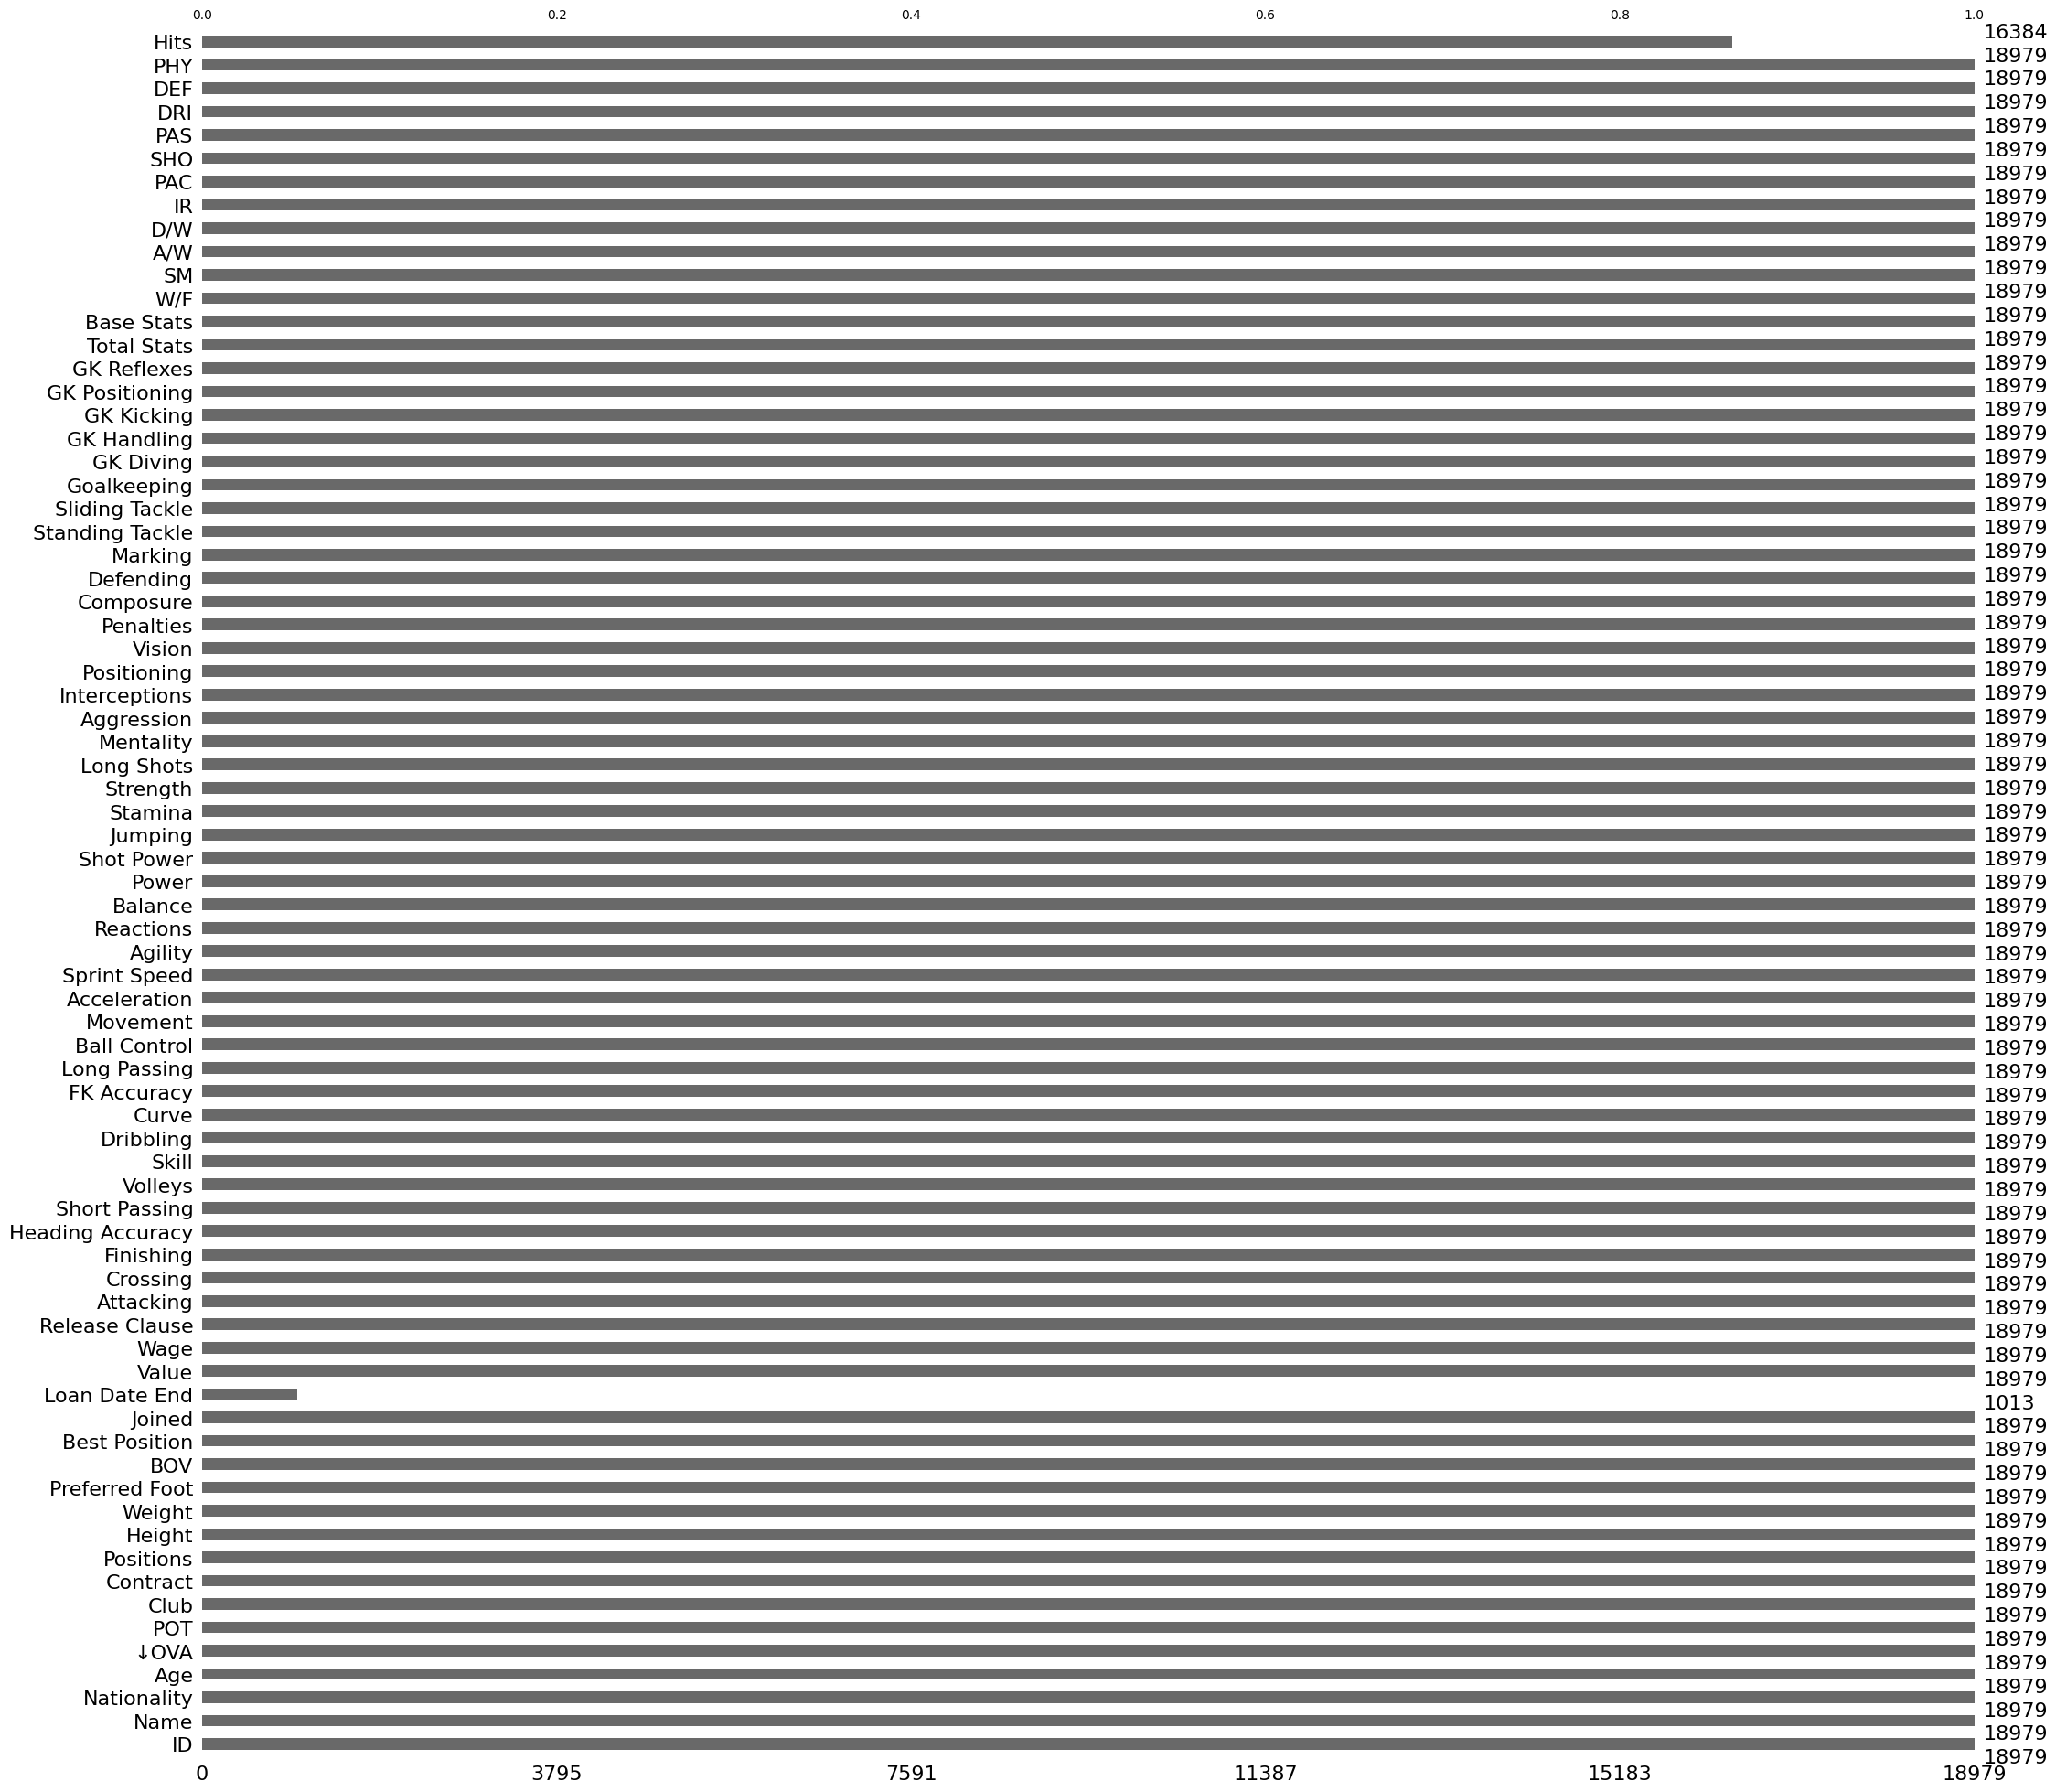

In [267]:
#visualizing dataset to observe missing value
msno.bar(fifa_df)

# Checking for Duplicates

In [268]:
duplicates_mask = fifa_df.duplicated()
duplicates_count = duplicates_mask.sum()
print('Number of duplicates:', duplicates_count)

Number of duplicates: 0


So we do not have any duplicated row.

# Handling columns with missing value

# Hits

In [269]:
fifa_df["Hits"].fillna(0, inplace = True)
fifa_df["Hits"]= fifa_df["Hits"].astype(str)
def convert_thousand(val):
    if "K" in val:
        res = val.strip("K")
        ans = float(res)*1000
        return ans
    else:
        return float(val)
fifa_df["Hits"] = fifa_df["Hits"].apply(lambda x: convert_thousand(x))

fifa_df["Hits"]= fifa_df["Hits"].astype(int)

Since "Hits" is the number of times a player's website was visited, so I set null to zero(meaning they have been visited yet).
Then I converted first to string, then "K" to thousand, then the whole column to int. 

# Loan Date End

In [270]:
# calculating the percentage of null value.
null_percent = fifa_df['Loan Date End'].isnull().mean() * 100
print(null_percent)

94.6625217345487


From the result above, we can see that over 94% of the "Loan Date End" column have null value so i consider it wise to drop that column cause it wont be effective in our analysis. 

In [271]:
fifa_df.drop("Loan Date End", axis =1, inplace=True)

# Cleaning columns one after another

# Club

In [272]:
fifa_df["Club"] = fifa_df["Club"].str.strip("\n")


we stripped of the "\n" from the "Club" column

# Contract

In [273]:
fifa_df["Contract"].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

From what we can see, this column emphasises more kind of contract the player is on, and the start date of the contract. Since we already have a "Joined" column stating the start date, we could convert this column to a "Contract_type" and "Contract_End".

In [274]:
def contract_type(data):
    _type = []
    for val in data:
        if 'Loan' in val:
            _type.append('Loan')
        elif 'Free' in val:
            _type.append('Free')
        else:
            _type.append('Active')
    return _type

fifa_df['Contract_type'] = pd.Series(contract_type(fifa_df.Contract)).astype('category')

Creating Contract_end

In [275]:
def convert_end(val):
    val= val.split(" ")
    if 'Free' in val:
        return val[0]
    elif "Loan" in val:
        return val[2]
    elif "~" in val:
        return val[2]
fifa_df["Contract_end"]= fifa_df["Contract"].apply(convert_end)

fifa_df.drop("Contract", axis =1, inplace = True)#dropped the Contract column

The "Contract_end" returns the end date of the player contract(active, loan) then return free for players without contract. 

# Height

In [276]:
fifa_df["Height"].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

We can see that there is no uniformity in the "Height" column, the heights are stored in feets and centimeter, so i will be converting all to centimeter.

In [277]:
def feet_to_cm(height):
    if "cm" in height:
        return height.strip("cm")
    else:
    
        height = height.strip('"')
        components = height.split('\'')
        feet = int(components[0])
        inches = 0
        if len(components) > 1:
            inches = int(components[1])

        # Convert the height to cm
        total_inches = feet * 12 + inches
        cm = total_inches * 2.54

        return cm  
feet_to_cm('6\'2"')

187.96

I created a function converting feet to cm, by just stripping "cm" when the Height is in cm, then converted it to inches then to cm, when it is not, then tested it.

In [278]:
fifa_df["Height(cm)"]= fifa_df["Height"].apply(lambda x: feet_to_cm(x))
fifa_df["Height(cm)"] = fifa_df["Height(cm)"].astype(float)


In [279]:
fifa_df.drop("Height", axis =1, inplace = True)# dropped the original Height column

# Weight

In [280]:
fifa_df["Weight"].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

We can see also that there is no uniformity in the "Weight" column, the weights are stored in kilogram and pounds, so i will be converting all to kilogram.

In [281]:
def pounds_to_kg (weight):
    if "kg" in weight:
        return weight.strip("kg")
    else:
        weight = weight.strip("lbs")
        result = int(weight)/ 2.205
        return result

pounds_to_kg ("154lbs")   

69.84126984126983

using the fuction above, i converted the all weight to Kg then applied it to a new column "Weight(kg)".

In [282]:
fifa_df["Weight(kg)"]= fifa_df["Weight"].apply(lambda x: pounds_to_kg (x) )
fifa_df["Weight(kg)"] = fifa_df["Weight(kg)"].astype(float)

In [283]:
fifa_df.drop("Weight", axis =1, inplace = True)# dropped the original weight column

# "Value", "Wage", "Release Clause"

In [284]:
fifa_df["Value"].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

Seeing that the "value", "wage" and "Release Clause" are all stored in thousands and millions

In [285]:
def currency(price):
    price= price.strip("€")
    if "M" in price:
        res = price.strip("M")
        ans = float(res)*1000000
        return ans
    elif "K" in price:
        res = price.strip("K")
        ans = float(res)*1000
        return ans
    else:
        return price

currency("€725K")       
        

725000.0

So I wrote a function that converts the words "thousands" and "millions" to numerical values.

In [286]:
fifa_df["Value(eur)"]= fifa_df["Value"].apply(lambda x: currency(x))
fifa_df["Value(eur)"] = fifa_df["Value(eur)"].astype(float)

In [287]:
fifa_df["Wage(eur)"]= fifa_df["Wage"].apply(lambda x: currency(x))
fifa_df["Wage(eur)"]= fifa_df["Wage(eur)"].astype(float)

In [288]:
fifa_df["Release Clause(eur)"]= fifa_df["Release Clause"].apply(lambda x: currency(x))
fifa_df["Release Clause(eur)"]= fifa_df["Release Clause(eur)"].astype(float)

Then I changed their data type to a float.

In [289]:
fifa_df = fifa_df.drop(columns=['Value', 'Wage',"Release Clause"])#dropping the old version of the cleaned column

# "W/F", "SM", "IR" columns

The following column contains some special character I need to get rid of, so I can store in the correct datatype.

In [290]:
fifa_df['W/F'] = fifa_df['W/F'].str.replace('[^a-zA-Z0-9]', '', regex=True)
fifa_df['SM'] = fifa_df['SM'].str.replace('[^a-zA-Z0-9]', '', regex=True)
fifa_df['IR'] = fifa_df['IR'].str.replace('[^a-zA-Z0-9]', '', regex=True)

In [291]:
fifa_df = fifa_df.astype({'W/F':"category",'SM':"category", 'IR':"category",'A/W':"category",'D/W':"category" })

Then i converted then to a "category" datatype, because the elements are rating values.

# Joined 

In [292]:
fifa_df['Joined'] = pd.to_datetime(fifa_df['Joined'])

Converted the joined to Datetime category.

# Checking the Cleaned data

In [293]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   18979 non-null  int64         
 1   Name                 18979 non-null  object        
 2   Nationality          18979 non-null  object        
 3   Age                  18979 non-null  int64         
 4   ↓OVA                 18979 non-null  int64         
 5   POT                  18979 non-null  int64         
 6   Club                 18979 non-null  object        
 7   Positions            18979 non-null  object        
 8   Preferred Foot       18979 non-null  object        
 9   BOV                  18979 non-null  int64         
 10  Best Position        18979 non-null  object        
 11  Joined               18979 non-null  datetime64[ns]
 12  Attacking            18979 non-null  int64         
 13  Crossing             18979 non-

In [294]:
fifa_df

,ID,Name,Nationality,Age,↓OVA,POT,Club,Positions,Preferred Foot,BOV,Best Position,Joined,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_type,Contract_end,Height(cm),Weight(kg),Value(eur),Wage(eur),Release Clause(eur)
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",Left,93,RW,2004-07-01,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,Active,2021,170.0,72.0,103500000.0,560000.0,138400000.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,"ST, LW",Right,92,ST,2018-07-10,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,Active,2022,187.0,83.0,63000000.0,220000.0,75900000.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,GK,Right,91,GK,2014-07-16,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,Active,2023,188.0,87.0,120000000.0,125000.0,159400000.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,"CAM, CM",Right,91,CAM,2015-08-30,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,Active,2023,181.0,70.0,129000000.0,370000.0,161000000.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",Right,91,LW,2017-08-03,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,Active,2022,175.0,68.0,132000000.0,270000.0,166500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,China PR,21,47,55,Wuhan Zall,CB,Right,49,CB,2018-07-13,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2,2,Medium,Medium,1,64,28,26,38,48,51,0,Active,2022,178.0,66.0,100000.0,1000.0,70000.0
18975,258760,B. Hough,England,17,47,67,Oldham Athletic,CM,Right,51,CAM,2020-08-01,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2,2,Medium,Medium,1,64,40,48,49,35,45,0,Active,2021,175.0,65.0,130000.0,500.0,165000.0
18976,252757,R. McKinley,England,18,47,65,Derry City,CM,Right,49,CAM,2019-03-08,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2,2,Medium,Medium,1,63,39,44,46,40,53,0,Active,2020,179.0,74.0,120000.0,500.0,131000.0
18977,243790,Wang Zhen'ao,China PR,20,47,57,Dalian YiFang FC,RW,Right,48,ST,2020-09-22,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3,2,Medium,Medium,1,58,49,41,49,30,44,0,Active,2022,175.0,69.0,100000.0,2000.0,88000.0


In [295]:
null_mask = fifa_df.isnull()
null_counts = null_mask.sum()
print( null_counts >0)

ID                     False
Name                   False
Nationality            False
Age                    False
↓OVA                   False
                       ...  
Height(cm)             False
Weight(kg)             False
Value(eur)             False
Wage(eur)              False
Release Clause(eur)    False
Length: 74, dtype: bool


We have no missing value in our cleaned file.

In [296]:
print(f" Number of duplicates: {fifa_df.duplicated().sum()}")

 Number of duplicates: 0


In [297]:
fifa_df.to_csv("./Documents/fifa_cleaned.csv", index = False)